# Car Price Prediction Project






 <b> Step1:Data Loading and inspection</b>

 The first step in any machine learning project is to load the dataset into the environment. In this case, we are working with the `car.csv` dataset, which contains various attributes of used cars along with their selling prices.

In [ ]:
!pip install gdown


In [ ]:
import gdown

# File ID from Google Drive link
file_id = "1UCyOTeyOI8y102_fDB3ayVYsJ41lBSrw"

# Download the file
gdown.download(f"https://drive.google.com/uc?id={file_id}", output="car.csv", quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1UCyOTeyOI8y102_fDB3ayVYsJ41lBSrw
To: /content/car.csv
100%|██████████| 799k/799k [00:00<00:00, 88.0MB/s]


'car.csv'

In [ ]:
import pandas as pd

df = pd.read_csv("car.csv")



In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [ ]:
# Shape and basic info
print(df.shape)



(8128, 12)


In [ ]:
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB
None


In [ ]:
# Statistical summary of numerical columns
print(df.describe())


              year  selling_price     km_driven  mileage(km/ltr/kg)  \
count  8128.000000   8.128000e+03  8.128000e+03         7907.000000   
mean   2013.804011   6.382718e+05  6.981951e+04           19.418783   
std       4.044249   8.062534e+05  5.655055e+04            4.037145   
min    1983.000000   2.999900e+04  1.000000e+00            0.000000   
25%    2011.000000   2.549990e+05  3.500000e+04           16.780000   
50%    2015.000000   4.500000e+05  6.000000e+04           19.300000   
75%    2017.000000   6.750000e+05  9.800000e+04           22.320000   
max    2020.000000   1.000000e+07  2.360457e+06           42.000000   

            engine        seats  
count  7907.000000  7907.000000  
mean   1458.625016     5.416719  
std     503.916303     0.959588  
min     624.000000     2.000000  
25%    1197.000000     5.000000  
50%    1248.000000     5.000000  
75%    1582.000000     5.000000  
max    3604.000000    14.000000  


## Step 2: Data Cleaning and Preprocessing

In this step, we prepare the dataset for analysis and modeling by handling inconsistencies, converting data types, and engineering useful features.

### 1. Check for Missing Values
- Identify columns that contain missing (null) values.
- Understand the extent and distribution of missing data.

### 2. Handle Missing Values
- Either **drop rows** with missing values if they are few, or
- **Impute values** using techniques like median, mean, or mode depending on the column type.

### 3. Convert String Columns to Numeric
- Some columns like `mileage`, `engine`, and `max_power` contain units (e.g., “kmpl”, “CC”, “bhp”).
- Remove text units and convert these columns to numeric types.

### 4. Create New Feature: Age of the Car
- Instead of using the manufacturing year directly, compute the **age** of the car as:
   age_of_car = current_year - manufacturing_year

### 5. Drop Irrelevant or Inconsistent Columns
- Are difficult to standardize
- Provide little predictive value

### 6. Encode Categorical Variables
- Convert categorical features such as `fuel`, `seller_type`, `transmission`, and `owner` into numeric form using **one-hot encoding**.
- This prepares the dataset for machine learning models, which work with numeric input.

---



```
LLM sugesstion used:
    1. Column Understanding: Explained that name includes brand
    2. Missing Values: Recommended median imputation for mileage, engine, seats, and careful handling of inconsistent max_power values.
    3. Outlier Treatment: Advised using the IQR method to detect outliers and apply log transformations to reduce skewness in selling_price and km_driven.
```       

In [ ]:

# Check for missing values
print(df.isnull().sum())

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64


In [ ]:

df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats'],
      dtype='object')

In [ ]:
df.rename(columns = {'mileage(km/ltr/kg)':'mileage'}, inplace = True)

In [ ]:
df.columns


Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

In [ ]:
# Define a list of known multi-word and single-word car brands
known_brands = [
    'Maruti', 'Hyundai', 'Honda', 'Toyota', 'Ford', 'Mahindra', 'Tata', 'Chevrolet',
    'Renault', 'Volkswagen', 'Skoda', 'Nissan', 'BMW', 'Mercedes-Benz', 'Audi',
    'Datsun', 'Jeep', 'Kia', 'MG', 'Fiat', 'Mitsubishi', 'Jaguar', 'Land Rover',
    'Volvo', 'Isuzu', 'Daewoo', 'Opel', 'Peugeot', 'Lexus', 'Ashok Leyland',
    'Force', 'Ambassador'
]

# Sort by length (longest first) to correctly capture multi-word brands first
known_brands_sorted = sorted(known_brands, key=lambda x: -len(x))

# Function to extract brand based on known brand names
def extract_brand(name):
    for brand in known_brands_sorted:
        if name.startswith(brand):
            return brand
    return name.split()[0]  # fallback to first word

# Apply the function
df['brand'] = df['name'].apply(extract_brand)


In [ ]:
df['brand'].value_counts()

,count
brand,
Maruti,2448
Hyundai,1415
Mahindra,772
Tata,734
Toyota,488
Honda,467
Ford,397
Chevrolet,230
Renault,228


In [ ]:

df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0,Maruti


In [ ]:
df.year

,year
0,2014
1,2014
2,2006
3,2010
4,2007
...,...
8123,2013
8124,2007
8125,2009
8126,2013


In [ ]:
current_year = 2025
df['age_of_car'] = current_year - df['year']
print(df['age_of_car'])


0       11
1       11
2       19
3       15
4       18
        ..
8123    12
8124    18
8125    16
8126    12
8127    12
Name: age_of_car, Length: 8128, dtype: int64


In [ ]:
print(df['selling_price'].describe())


count    8.128000e+03
mean     6.382718e+05
std      8.062534e+05
min      2.999900e+04
25%      2.549990e+05
50%      4.500000e+05
75%      6.750000e+05
max      1.000000e+07
Name: selling_price, dtype: float64


In [ ]:
max_price = df['selling_price'].max()
expensive_cars = df[df['selling_price'] == max_price]
print(expensive_cars[['name', 'year', 'selling_price', 'brand']])


                              name  year  selling_price  brand
170  Volvo XC90 T8 Excellence BSIV  2017       10000000  Volvo


In [ ]:
top_n = 5
top_expensive_cars = df.nlargest(top_n, 'selling_price')
print(top_expensive_cars[['name', 'year', 'selling_price', 'brand']])


                                 name  year  selling_price          brand
170     Volvo XC90 T8 Excellence BSIV  2017       10000000          Volvo
2938            BMW X7 xDrive 30d DPE  2020        7200000            BMW
4952           Audi A6 35 TFSI Matrix  2019        6523000           Audi
4950           Audi A6 35 TFSI Matrix  2019        6223000           Audi
136   Mercedes-Benz S-Class S 350 CDI  2017        6000000  Mercedes-Benz


In [ ]:
print(df['km_driven'].describe())


count    8.128000e+03
mean     6.981951e+04
std      5.655055e+04
min      1.000000e+00
25%      3.500000e+04
50%      6.000000e+04
75%      9.800000e+04
max      2.360457e+06
Name: km_driven, dtype: float64


In [ ]:
max_km = df['km_driven'].max()
most_driven_cars = df[df['km_driven'] == max_km]
print(most_driven_cars[['name', 'year', 'km_driven', 'selling_price', 'brand']])


                      name  year  km_driven  selling_price    brand
3486  Hyundai i20 Asta 1.2  2007    2360457         550000  Hyundai


In [ ]:
top_n = 10
top_driven_cars = df.nlargest(top_n, 'km_driven')
print(top_driven_cars[['name', 'year', 'km_driven', 'selling_price', 'brand']])


                                               name  year  km_driven  \
3486                           Hyundai i20 Asta 1.2  2007    2360457   
1810                         Mahindra XUV500 W6 2WD  2012    1500000   
3508                       Maruti Wagon R LXI Minor  2010     577414   
3641                       Maruti Wagon R VXI BS IV  2011     500000   
6673  Toyota Innova 2.5 EV Diesel PS 7 Seater BSIII  2011     500000   
5106                          Mahindra Scorpio M2DI  2011     475000   
5189         Toyota Innova 2.5 VX (Diesel) 7 Seater  2013     440000   
5467   Toyota Innova 2.5 VX (Diesel) 7 Seater BS IV  2010     426000   
2272                            Mahindra Bolero SLE  2010     380000   
7102            Toyota Innova 2.5 V Diesel 8-seater  2007     376412   

      selling_price     brand  
3486         550000   Hyundai  
1810         500000  Mahindra  
3508         194000    Maruti  
3641         229999    Maruti  
6673         350000    Toyota  
5106         40

In [ ]:
max_km = df['km_driven'].max()
most_driven_cars = df[df['km_driven'] == max_km]
print(most_driven_cars[['name', 'year', 'km_driven', 'selling_price', 'brand']])


                      name  year  km_driven  selling_price    brand
3486  Hyundai i20 Asta 1.2  2007    2360457         550000  Hyundai


In [ ]:
df['fuel'].value_counts()

,count
fuel,
Diesel,4402
Petrol,3631
CNG,57
LPG,38


In [ ]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [ ]:
df['seller_type'].value_counts()

,count
seller_type,
Individual,6766
Dealer,1126
Trustmark Dealer,236


In [ ]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [ ]:
df['transmission'].value_counts()

,count
transmission,
Manual,7078
Automatic,1050


In [ ]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [ ]:
df['owner'].value_counts()

,count
owner,
First Owner,5289
Second Owner,2105
Third Owner,555
Fourth & Above Owner,174
Test Drive Car,5


In [ ]:
print(df['mileage'].isnull().sum())


221


Impute using group-wise median

Better: Use median mileage based on similar cars (e.g., by brand or fuel type):

In [ ]:
# fill with median mileage of same brand
df['mileage'] = df.groupby('brand')['mileage'].transform(lambda x: x.fillna(x.median()))


In [ ]:
print(df['mileage'].isnull().sum())

1


In [ ]:
df[df['mileage'].isnull()]


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand,age_of_car
6730,Peugeot 309 GLD,1997,57000,110000,Diesel,Individual,Manual,Third Owner,NaN,NaN,NaN,NaN,Peugeot,28


In [ ]:
df.loc[6730, 'mileage'] = 18.0


In [ ]:
df['engine'].unique()

array([1248., 1498., 1497., 1396., 1298., 1197., 1061.,  796., 1364.,
       1399., 1461.,  993.,   nan, 1198., 1199.,  998., 1591., 2179.,
       1368., 2982., 2494., 2143., 2477., 1462., 2755., 1968., 1798.,
       1196., 1373., 1598., 1998., 1086., 1194., 1172., 1405., 1582.,
        999., 2487., 1999., 3604., 2987., 1995., 1451., 1969., 2967.,
       2497., 1797., 1991., 2362., 1493., 1599., 1341., 1794.,  799.,
       1193., 2696., 1495., 1186., 1047., 2498., 2956., 2523., 1120.,
        624., 1496., 1984., 2354.,  814.,  793., 1799.,  936., 1956.,
       1997., 1499., 1948., 2997., 2489., 2499., 2609., 2953., 1150.,
       1994., 1388., 1527., 2199.,  995., 2993., 1586., 1390.,  909.,
       2393., 3198., 1339., 2835., 2092., 1595., 2496., 1596., 1597.,
       2596., 2148., 1299., 1590., 2231., 2694., 2200., 1795., 1896.,
       1796., 1422., 1489., 2359., 2197., 2999., 1781., 2650., 1343.,
       2446., 3498., 2198., 2776., 1950.])

In [ ]:
print(df['engine'].isnull().sum())


221


In [ ]:
engine = df.groupby('brand')['engine'].median()
print(engine.sort_values())


brand
Daewoo            796.0
Renault           999.0
Maruti           1197.0
Hyundai          1197.0
Datsun           1198.0
Chevrolet        1199.0
Fiat             1248.0
Tata             1396.0
MG               1451.0
Ashok Leyland    1461.0
Nissan           1461.0
Kia              1493.0
Ford             1497.0
Honda            1497.0
Volkswagen       1498.0
Opel             1598.0
Skoda            1598.0
Jeep             1956.0
Audi             1968.0
Volvo            1969.0
BMW              1995.0
Ambassador       1995.0
Jaguar           1999.0
Land Rover       1999.0
Mercedes-Benz    2143.0
Mahindra         2179.0
Force            2398.0
Mitsubishi       2477.0
Lexus            2487.0
Toyota           2494.0
Isuzu            2999.0
Peugeot             NaN
Name: engine, dtype: float64


In [ ]:
df.loc[6730, 'engine'] = 1905


In [ ]:
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')  # convert, set errors to NaN


In [ ]:
print(df['max_power'].isnull().sum())


216


In [ ]:
df['max_power'] = df.groupby('brand')['max_power'].transform(lambda x: x.fillna(x.median()))
df['max_power'] = df['max_power'].fillna(df['max_power'].median())


In [ ]:
df['max_power'] = df['max_power'].replace(0, pd.NA)


In [ ]:
df['max_power'] = df.groupby('brand')['max_power'].transform(lambda x: x.fillna(x.median()))
df['max_power'].fillna(df['max_power'].median())


In [ ]:
df['seats'].isnull().sum()

np.int64(221)

In [ ]:
def fill_seats_mode(series):
    mode_val = series.mode()
    if len(mode_val) > 0:
        return series.fillna(mode_val[0])
    else:
        return series.fillna(series.median())  # fallback just in case

# Use transform instead of apply to maintain the original index
df['seats'] = df.groupby('brand')['seats'].transform(fill_seats_mode)

# Fill any remaining missing values with the overall mode
df['seats'] = df['seats'].fillna(df['seats'].mode()[0])

df['seats'] = df['seats'].astype(int)

In [ ]:
df['mileage_per_cc'] = df['mileage'] / df['engine']


In [ ]:
brand_counts = df['brand'].value_counts()
total = brand_counts.sum()

# Get rare brands (those contributing < 2% of the total)
brand_percent = (brand_counts / total) * 100
rare_brands = brand_percent[brand_percent < 2]


## Step 3: Exploratory Data Analysis (EDA)

The purpose of EDA is to understand the data distribution, relationships between features, and identify any patterns or anomalies before modeling.

### 1. Understand Data Distribution
- Visualize the distribution of key numerical features such as `selling_price`, `km_driven`, `mileage`, `engine`, `max_power`, and `age_of_car`.
- Use histograms, box plots, or density plots to check for skewness, outliers, and spread.

### 2. Analyze Categorical Features
- Plot bar charts or count plots to see the frequency distribution of categorical variables like `fuel`, `seller_type`, `transmission`, and `owner`.
- Identify dominant categories or imbalance issues.

### 3. Detect Outliers
- Use boxplots or the Interquartile Range (IQR) method to detect outliers in numeric features.
- Consider handling or removing outliers if they can adversely affect the model.

### 4. Study Relationships Between Features
- Use scatter plots or pair plots to visualize relationships.
- Check correlation of features with the target variable `selling_price` to identify strong predictors.


---




# Univariate Analysis
# (a) Histogram for Numerical Features

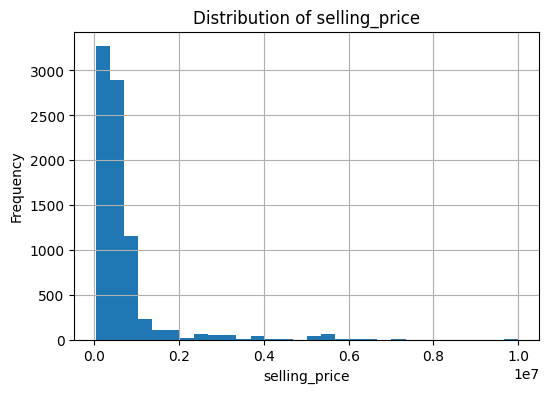

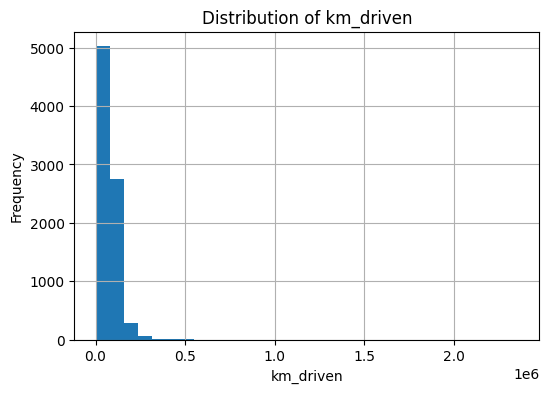

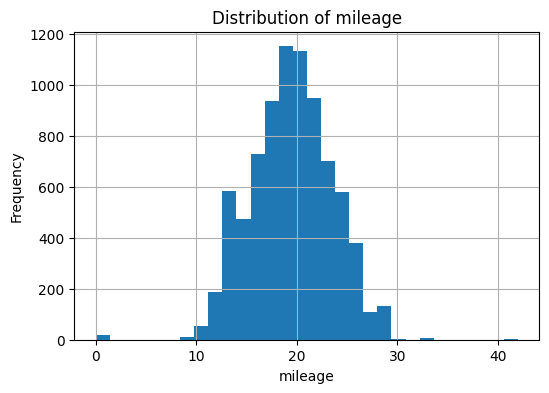

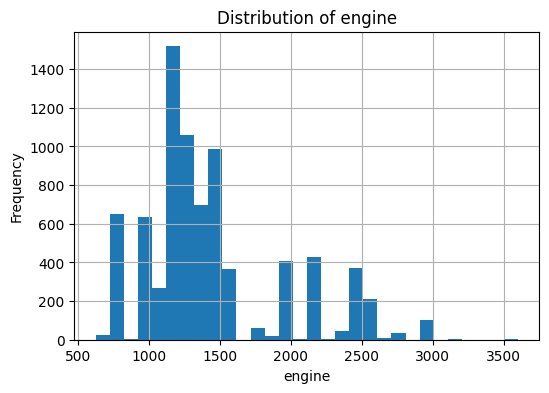

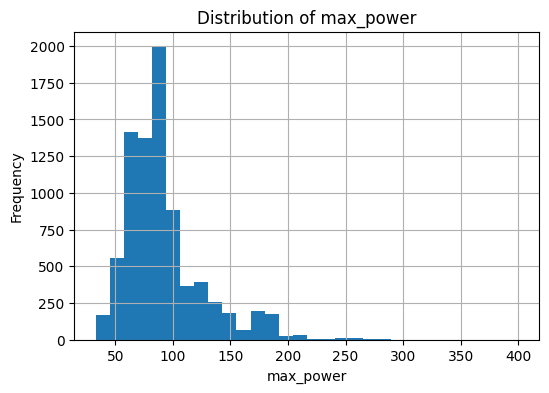

In [ ]:
import matplotlib.pyplot as plt

numerical_cols = ['selling_price', 'km_driven', 'mileage', 'engine', 'max_power']

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    df[col].dropna().astype(float).hist(bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


We can see that distribution for the selling price is not normal, For milegge it seems to be normally distributed and engine & max_power seems to be right skewed

# (b) Count Plots for Categorical Features

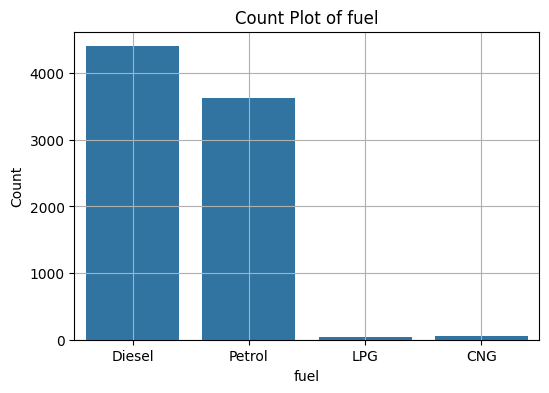

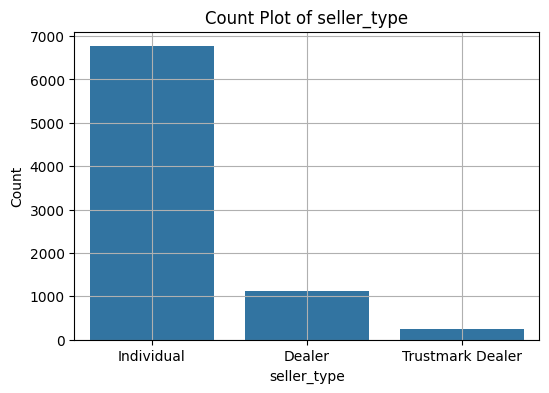

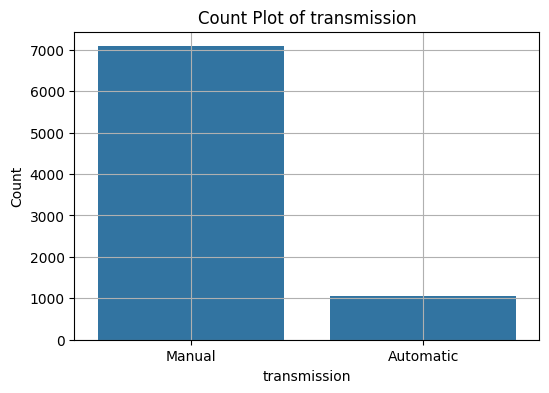

In [ ]:
import seaborn as sns

categorical_cols = ['fuel', 'seller_type', 'transmission']

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()


```
car with diesel as a fuel are more in number.
mostly sellers are individual.
cars have manual transmission.
```

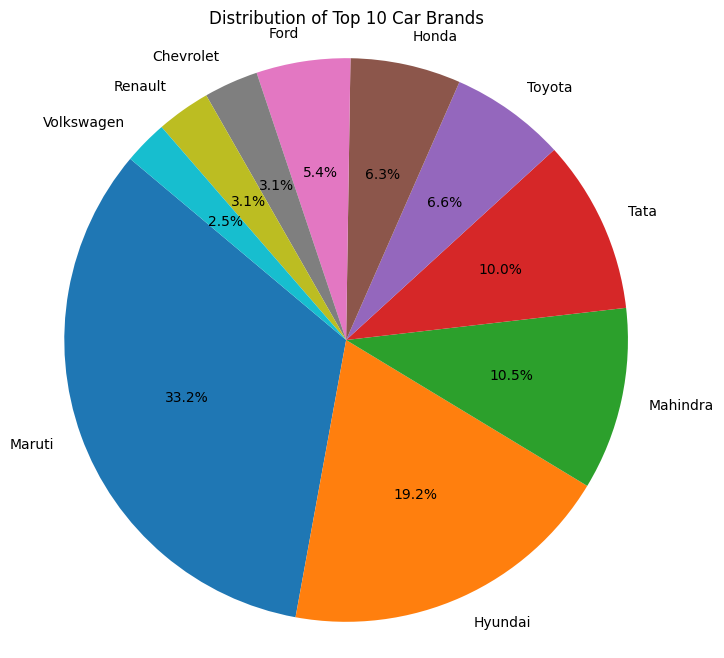

In [ ]:
import matplotlib.pyplot as plt

# Count top 10 brands
top_brands = df['brand'].value_counts().nlargest(10)

# Pie chart
plt.figure(figsize=(8,8))
plt.pie(top_brands, labels=top_brands.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Top 10 Car Brands')
plt.axis('equal')  # Equal aspect ratio for a circle
plt.show()


Maruti and Hyundai have highest distribuyion of car.

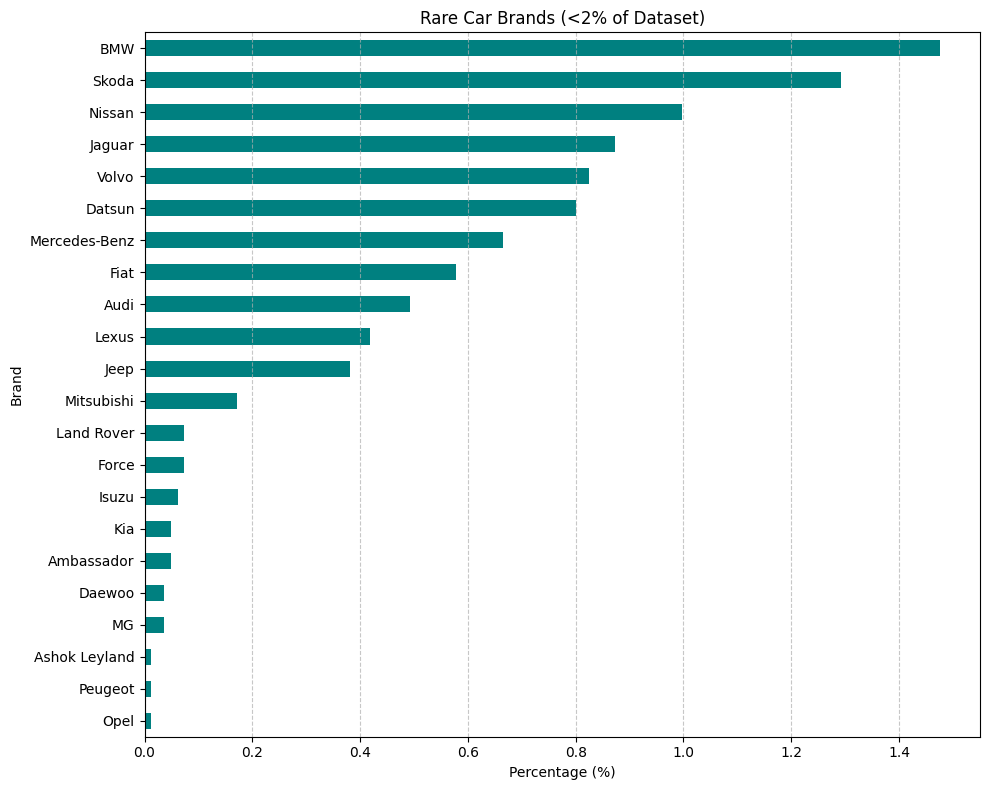

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
rare_brands.sort_values().plot(kind='barh', color='teal')

plt.title('Rare Car Brands (<2% of Dataset)')
plt.xlabel('Percentage (%)')
plt.ylabel('Brand')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


BMW,skoda,nissan,volvo are very less in dataset.

#  Bivariate Analysis

# (a) Correlation Heatmap (for numeric columns)

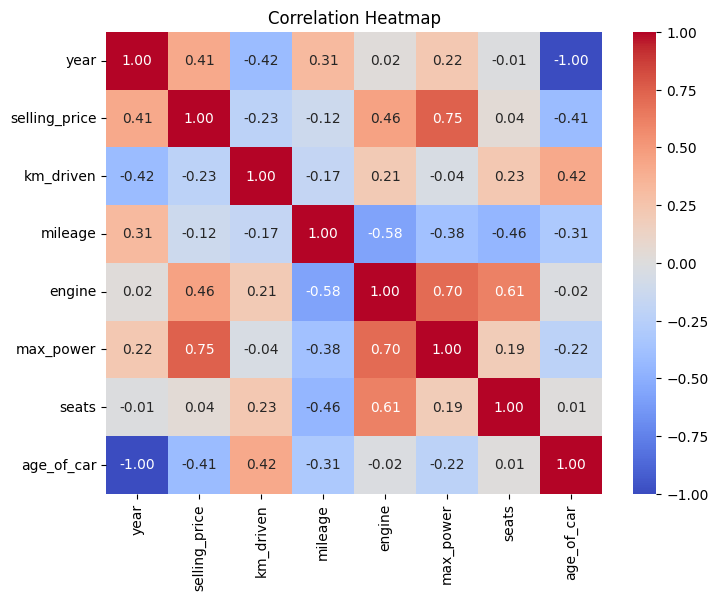

In [ ]:
plt.figure(figsize=(8,6))
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


##  Correlation Heatmap Analysis

The correlation matrix below shows how strongly each numerical feature is related to the others, especially to `selling_price`. Correlation values range from:

- **+1** = perfect positive correlation  
- **0** = no correlation  
- **–1** = perfect negative correlation  

---

###  Key Insights

| Feature         | Correlation with `selling_price` | Interpretation |
|----------------|----------------------------------|----------------|
| **max_power**   | **+0.75**                        | Strong positive — higher power cars tend to be priced higher.  |
| **engine**      | +0.46                            | Moderate positive — bigger engines usually cost more.  |
| **year**        | +0.41                            | Newer cars sell for more.  |
| **age_of_car**  | **–0.41**                        | As expected — older cars sell for less.  |
| **km_driven**   | –0.23                            | Slight negative — more driven cars lose value.  |
| **mileage**     | –0.12                            | Weak relationship — may need better transformation or feature interaction. |
| **seats**       | +0.04                            | Very weak — probably not an important feature. |

---

###  Conclusion

The heatmap looks correct and meaningful:

- `max_power`
- `engine`
- `year` or `age_of_car`



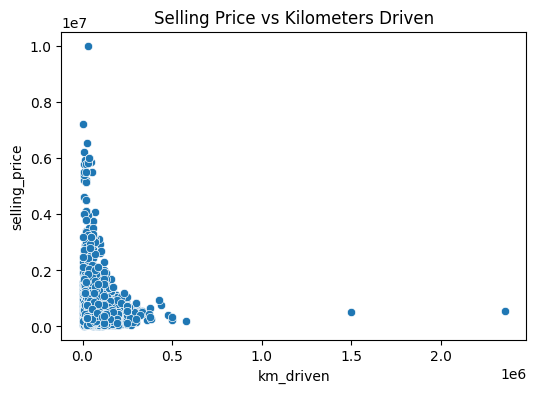

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='km_driven', y='selling_price', data=df)
plt.title('Selling Price vs Kilometers Driven')
plt.show()


with the increase in km, selling price also decreases.

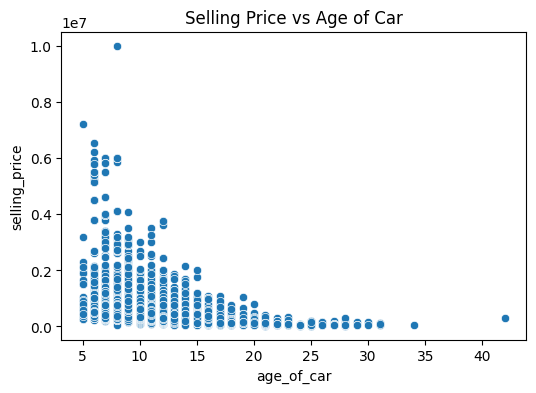

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='age_of_car', y='selling_price', data=df)
plt.title('Selling Price vs Age of Car')
plt.show()


selling price of the car decreases with the in increase in age of the car.

Total outliers in selling_price: 600
Lower Bound: -375002.5
Upper Bound: 1305001.5


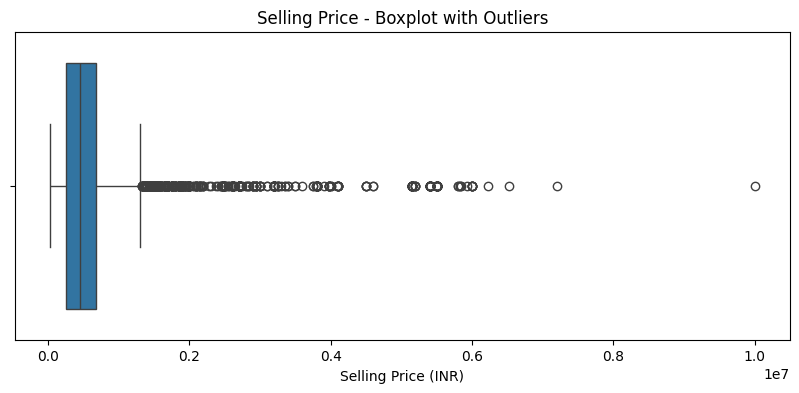

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate IQR
Q1 = df['selling_price'].quantile(0.25)
Q3 = df['selling_price'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Identify outliers
outliers = df[(df['selling_price'] < lower_bound) | (df['selling_price'] > upper_bound)]

# Step 4: Show summary
print(f"Total outliers in selling_price: {len(outliers)}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# Step 5: Visualize with boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['selling_price'])
plt.title('Selling Price - Boxplot with Outliers')
plt.xlabel('Selling Price (INR)')
plt.show()


Total outliers in km_driven: 170
Lower Bound: -59500.0
Upper Bound: 192500.0


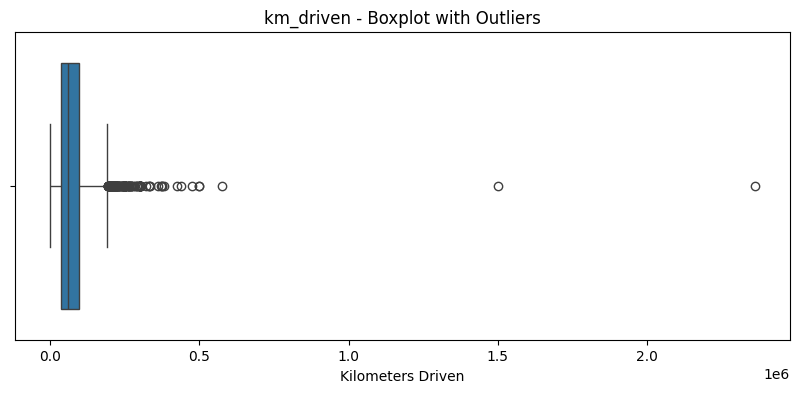

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate IQR for km_driven
Q1_km = df['km_driven'].quantile(0.25)
Q3_km = df['km_driven'].quantile(0.75)
IQR_km = Q3_km - Q1_km

# Step 2: Define outlier thresholds
lower_bound_km = Q1_km - 1.5 * IQR_km
upper_bound_km = Q3_km + 1.5 * IQR_km

# Step 3: Identify outliers
outliers_km = df[(df['km_driven'] < lower_bound_km) | (df['km_driven'] > upper_bound_km)]

# Step 4: Show summary
print(f"Total outliers in km_driven: {len(outliers_km)}")
print(f"Lower Bound: {lower_bound_km}")
print(f"Upper Bound: {upper_bound_km}")

# Step 5: Visualize with boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['km_driven'])
plt.title('km_driven - Boxplot with Outliers')
plt.xlabel('Kilometers Driven')
plt.show()


we can see there is presence of outlier in the km_driven.

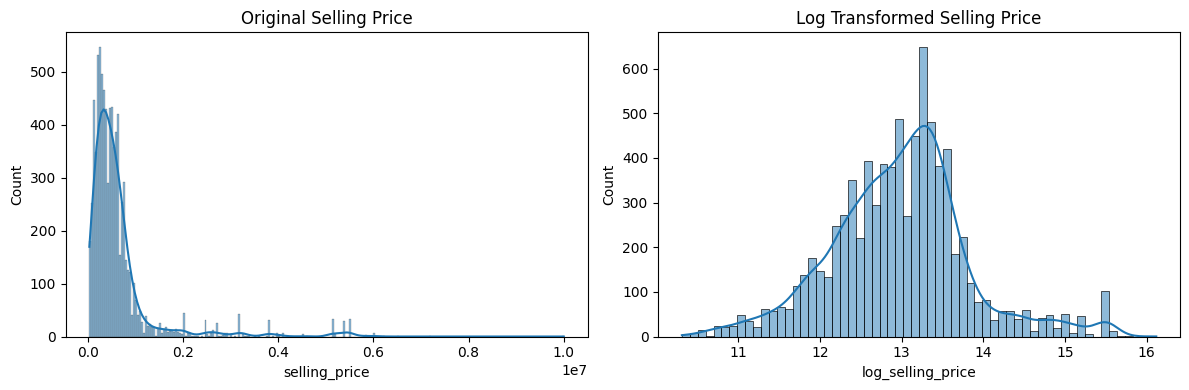

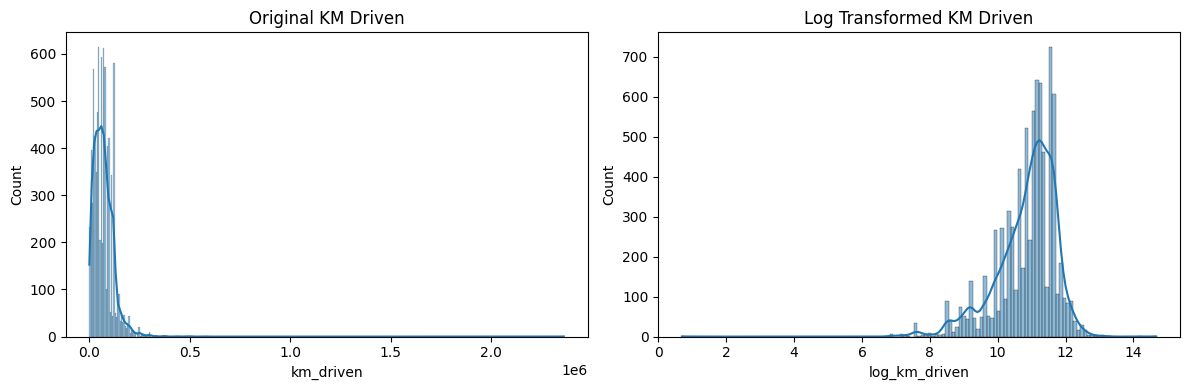

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Apply log1p transformation
df['log_selling_price'] = np.log1p(df['selling_price'])
df['log_km_driven'] = np.log1p(df['km_driven'])

# Visualize selling_price
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['selling_price'], kde=True)
plt.title("Original Selling Price")

plt.subplot(1, 2, 2)
sns.histplot(df['log_selling_price'], kde=True)
plt.title("Log Transformed Selling Price")

plt.tight_layout()
plt.show()

# Visualize km_driven
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['km_driven'], kde=True)
plt.title("Original KM Driven")

plt.subplot(1, 2, 2)
sns.histplot(df['log_km_driven'], kde=True)
plt.title("Log Transformed KM Driven")

plt.tight_layout()
plt.show()


# The right skewed histogram are tried to make normally distributed by using log transformation.

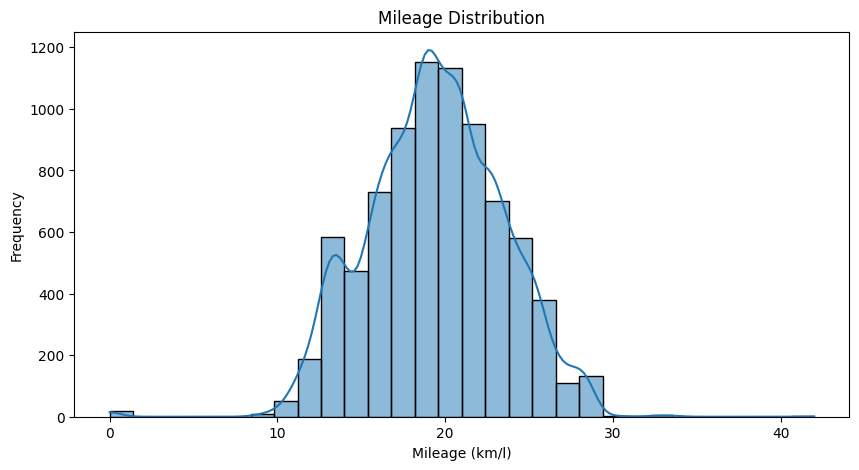

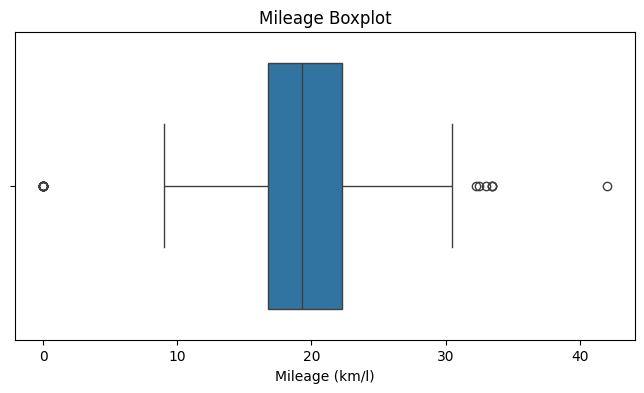

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is called df and the column is 'mileage'

# Basic histogram
plt.figure(figsize=(10,5))
sns.histplot(df['mileage'].dropna(), bins=30, kde=True)
plt.title('Mileage Distribution')
plt.xlabel('Mileage (km/l)')
plt.ylabel('Frequency')
plt.show()

# Boxplot to see outliers clearly
plt.figure(figsize=(8,4))
sns.boxplot(x=df['mileage'].dropna())
plt.title('Mileage Boxplot')
plt.xlabel('Mileage (km/l)')
plt.show()


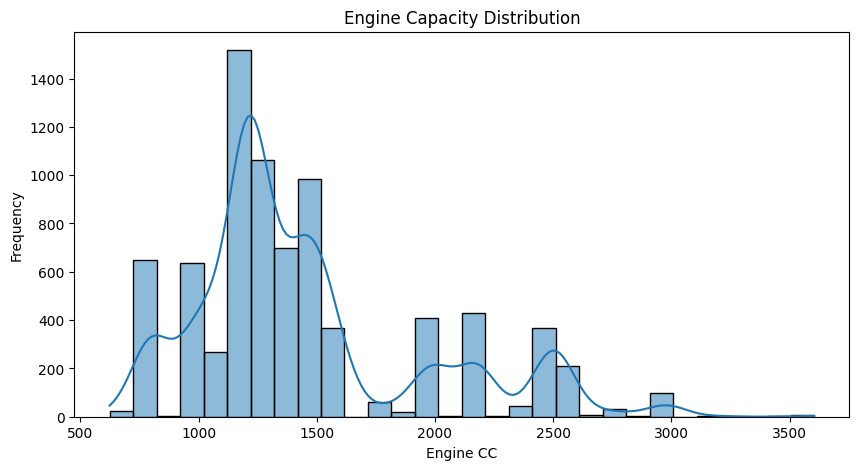

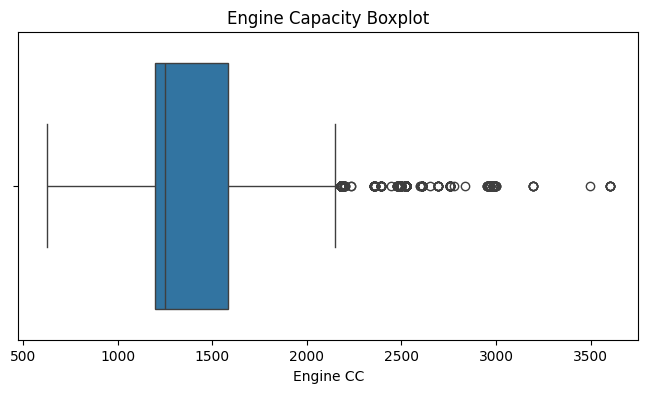

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['engine'], bins=30, kde=True)
plt.title('Engine Capacity Distribution')
plt.xlabel('Engine CC')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x=df['engine'].dropna())
plt.title('Engine Capacity Boxplot')
plt.xlabel('Engine CC')
plt.show()


In [ ]:
# Count vehicles with engine > 2000 cc
num_vehicles_above_2000cc = df[df['engine'] > 2000].shape[0]

print(f"Number of vehicles with engine capacity > 2000 cc: {num_vehicles_above_2000cc}")


Number of vehicles with engine capacity > 2000 cc: 1213


In [ ]:
Q1 = df['engine'].quantile(0.25)
Q3 = df['engine'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# Find outliers
outliers = df[(df['engine'] < lower_bound) | (df['engine'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")

# Optionally, remove outliers
df = df[(df['engine'] >= lower_bound) & (df['engine'] <= upper_bound)]


Lower Bound: 619.5
Upper Bound: 2159.5
Number of outliers: 1183


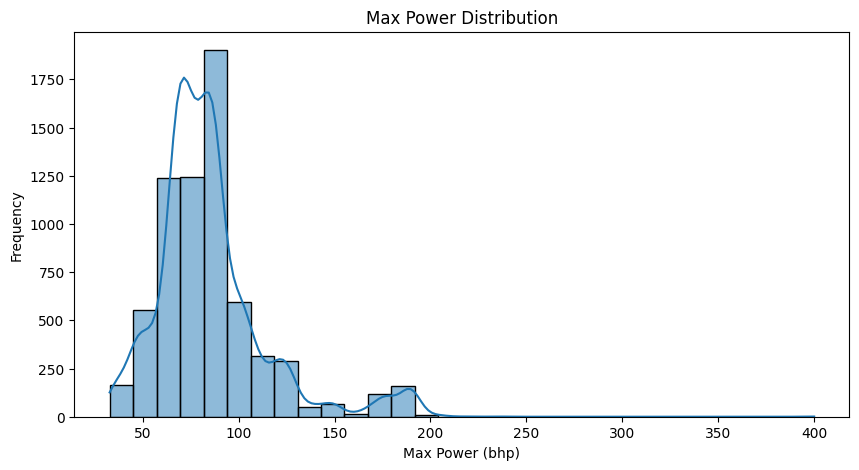

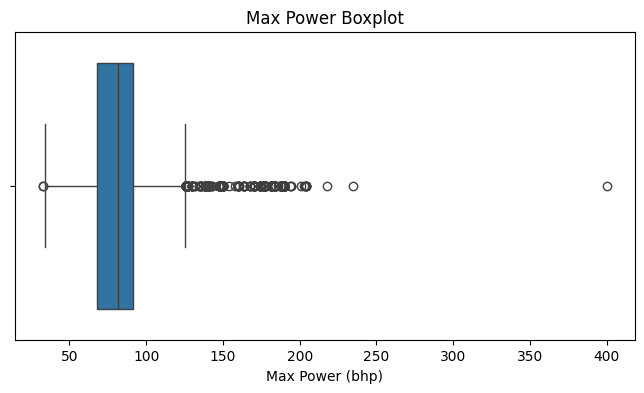

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['max_power'], bins=30, kde=True)
plt.title('Max Power Distribution')
plt.xlabel('Max Power (bhp)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x=df['max_power'])
plt.title('Max Power Boxplot')
plt.xlabel('Max Power (bhp)')
plt.show()


In [ ]:
Q1 = df['max_power'].quantile(0.25)
Q3 = df['max_power'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# Identify outliers
outliers = df[(df['max_power'] < lower_bound) | (df['max_power'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")

# Optional: Remove outliers
df = df[(df['max_power'] >= lower_bound) & (df['max_power'] <= upper_bound)]


Lower Bound: 33.35000000000001
Upper Bound: 125.74999999999999
Number of outliers: 598


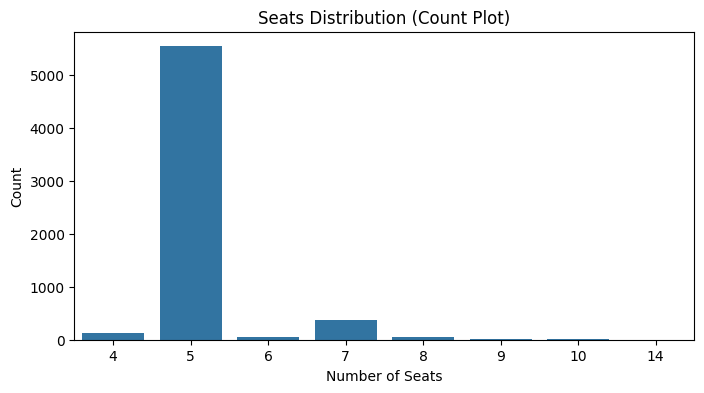

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar Chart (using value counts)
seat_counts = df['seats'].value_counts().sort_index()



# Count Plot (seaborn)
plt.figure(figsize=(8,4))
sns.countplot(x='seats', data=df, order=sorted(df['seats'].dropna().unique()))
plt.title('Seats Distribution (Count Plot)')
plt.xlabel('Number of Seats')
plt.ylabel('Count')
plt.show()


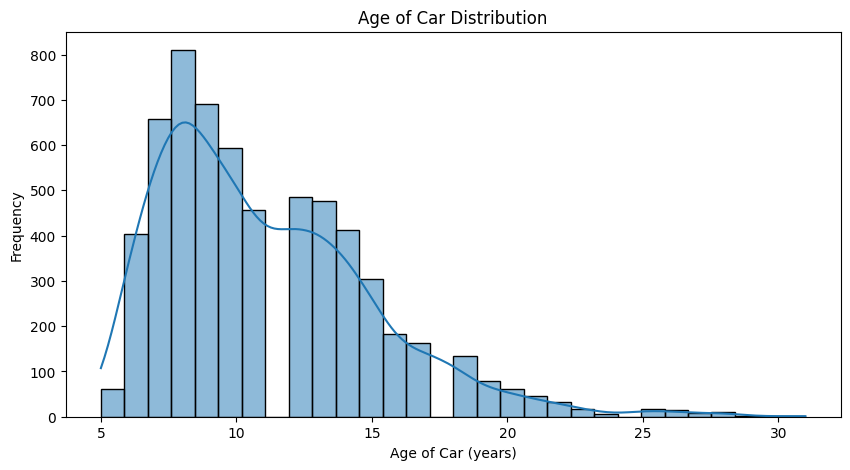

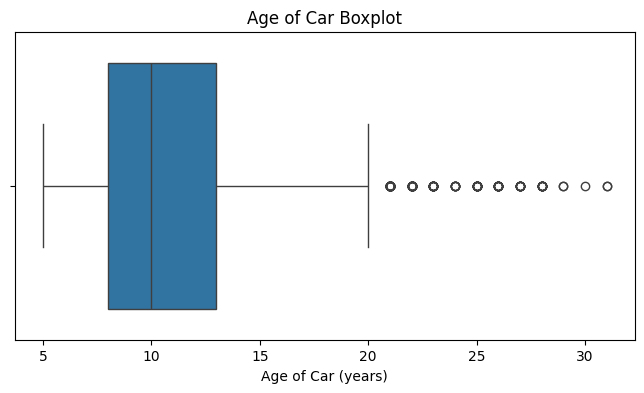

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['age_of_car'].dropna(), bins=30, kde=True)
plt.title('Age of Car Distribution')
plt.xlabel('Age of Car (years)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x=df['age_of_car'].dropna())
plt.title('Age of Car Boxplot')
plt.xlabel('Age of Car (years)')
plt.show()

In [ ]:
Q1 = df['age_of_car'].quantile(0.25)
Q3 = df['age_of_car'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# Identify outliers
outliers = df[(df['age_of_car'] < lower_bound) | (df['age_of_car'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")

# Optionally, remove outliers
df = df[(df['age_of_car'] >= lower_bound) & (df['age_of_car'] <= upper_bound)]


Lower Bound: 0.5
Upper Bound: 20.5
Number of outliers: 154


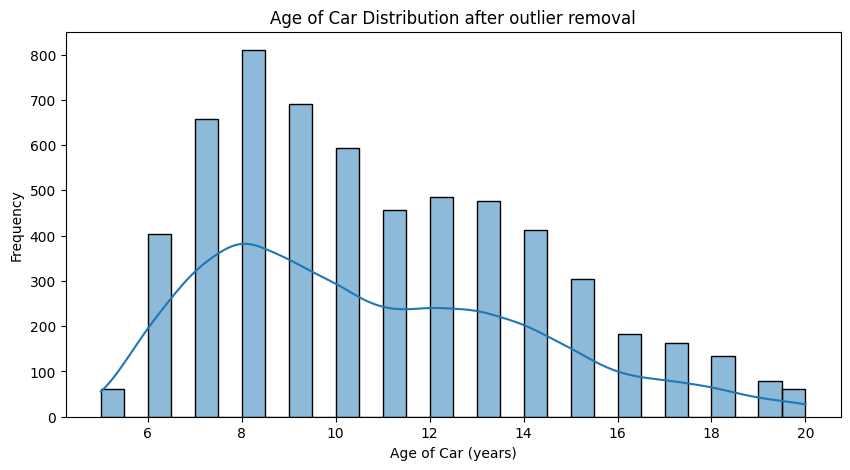

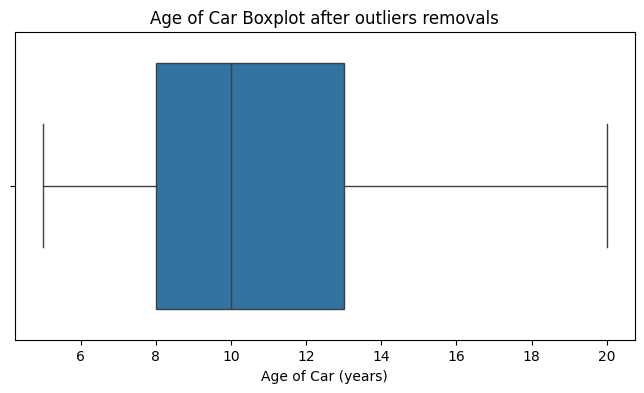

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['age_of_car'].dropna(), bins=30, kde=True)
plt.title('Age of Car Distribution after outlier removal')
plt.xlabel('Age of Car (years)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x=df['age_of_car'].dropna())
plt.title('Age of Car Boxplot after outliers removals')
plt.xlabel('Age of Car (years)')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


In [ ]:
# One-hot encode selected categorical columns (dropping the first category to avoid multicollinearity)
df_encoded = pd.get_dummies(df, columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)

# Select numerical features
num_features = ['log_km_driven', 'mileage', 'engine', 'max_power', 'age_of_car']

# Select all one-hot encoded categorical feature columns
cat_features = [col for col in df_encoded.columns if col.startswith(('fuel_', 'seller_type_', 'transmission_', 'owner_'))]

# Combine both numerical and categorical features
features = num_features + cat_features

# Define X and y for the regression model
X = df_encoded[features]                     # Input features
y = df_encoded['log_selling_price']          # Target variable


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

# In original scale
y_test_original = np.expm1(y_test)
y_pred_original = np.expm1(y_pred)

# Evaluation
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test_original, y_pred_original))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test_original, y_pred_original)))
print("R² Score:", r2_score(y_test_original, y_pred_original))


Mean Absolute Error (MAE): 80028.13560756664
Root Mean Squared Error (RMSE): 109245.3006434733
R² Score: 0.8142454319703376


- **MAE (80028.14):** On average, the model's predictions differ from actual values by about 80,028 units.  
- **RMSE (109245.30):** The model's prediction errors have a standard deviation of about 109,245 units, penalizing larger errors more.  
- **R² Score (0.81):** The model explains 81% of the variance in the target variable, indicating good predictive performance.


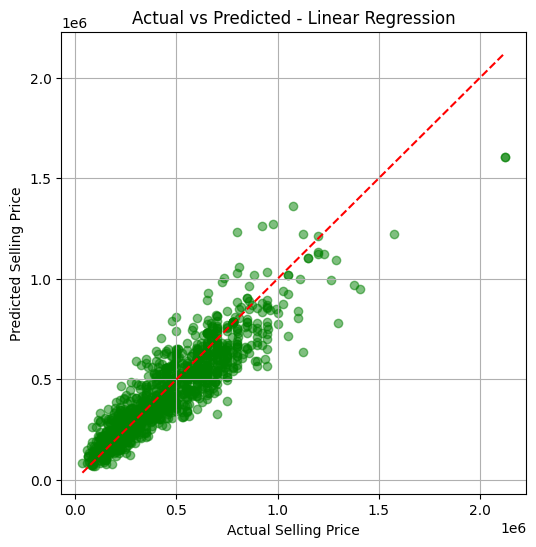

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(y_test_original, y_pred_original, alpha=0.5, color='green')
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()],
         'r--')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted - Linear Regression')
plt.grid(True)
plt.show()


```

    Data fits well along the line:

    The model's predictions are close to actual values.

    The residuals (differences between predicted and actual values) are small
    
    
```

# Lets check for further assumptions for verification of goodness of fit test

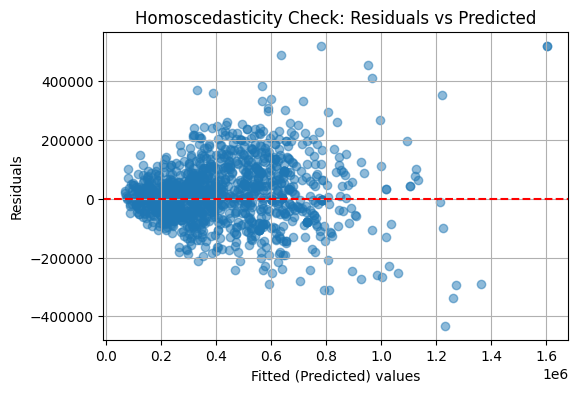

In [ ]:
residuals = y_test_original - y_pred_original

plt.figure(figsize=(6,4))
plt.scatter(y_pred_original, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted (Predicted) values")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check: Residuals vs Predicted")
plt.grid(True)
plt.show()

we can see there is no any funnel shape so there is no heteroskydasticity .

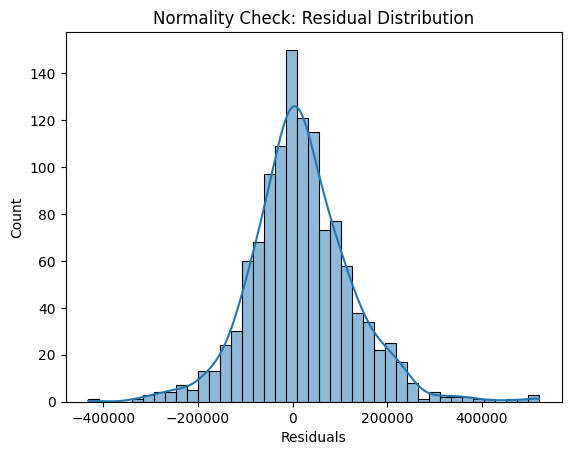

In [ ]:
import seaborn as sns
sns.histplot(residuals, kde=True)
plt.title("Normality Check: Residual Distribution")
plt.xlabel("Residuals")
plt.show()


Errors are normally distributed.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd # Import pandas if not already imported

# Convert boolean columns to integers
X_numeric = X.copy()
for col in X_numeric.columns:
    if X_numeric[col].dtype == 'bool':
        X_numeric[col] = X_numeric[col].astype(int)

X_vif = add_constant(X_numeric)  # Add intercept term

# Ensure no infinite values before VIF calculation (double-check after conversion)
X_vif = X_vif.replace([np.inf, -np.inf], np.nan).dropna()

# Recalculate VIF data - need to align X_vif with the original X.columns for feature names
# We need to ensure the index of X_vif matches the index used for looping
# Let's get the VIF values based on the columns of the processed X_vif
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# The first row is the constant, which typically has a high VIF and can be ignored for feature multicollinearity
# Filter out the constant term for a clearer view of feature multicollinearity
vif_data = vif_data[vif_data['feature'] != 'const'].sort_values(by='VIF', ascending=False)


print(vif_data)

                         feature        VIF
8                    fuel_Petrol  30.633642
6                    fuel_Diesel  29.644028
3                         engine   5.036430
4                      max_power   3.540798
5                     age_of_car   2.317089
2                        mileage   2.223396
1                  log_km_driven   1.858748
7                       fuel_LPG   1.660692
9         seller_type_Individual   1.308217
13            owner_Second Owner   1.280692
10  seller_type_Trustmark Dealer   1.261511
15             owner_Third Owner   1.187634
11           transmission_Manual   1.181229
12    owner_Fourth & Above Owner   1.074484
14          owner_Test Drive Car   1.003550


In [ ]:
# we can see all the VIF values are less expect fuel_petrol and fuel_diesel which arent used in feature.

In [ ]:
from sklearn.ensemble import RandomForestRegressor


In [ ]:
rf = RandomForestRegressor(
    n_estimators=100,       # number of trees
    random_state=42,
    n_jobs=-1               # use all CPU cores
)

rf.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
y_pred_rf = rf.predict(X_test)

# Convert log values back to actual prices
y_test_rf_original = np.expm1(y_test)
y_pred_rf_original = np.expm1(y_pred_rf)

# Evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Random Forest MAE:", mean_absolute_error(y_test_rf_original, y_pred_rf_original))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test_rf_original, y_pred_rf_original)))
print("Random Forest R² Score:", r2_score(y_test_rf_original, y_pred_rf_original))


Random Forest MAE: 52175.91684153478
Random Forest RMSE: 80771.24983390461
Random Forest R² Score: 0.8984575634086919


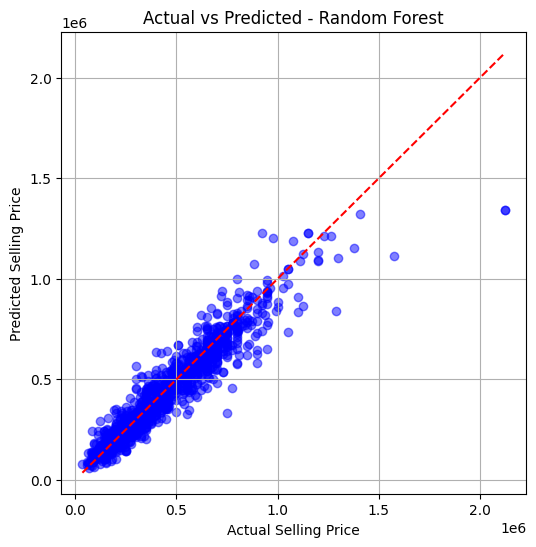

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test_rf_original, y_pred_rf_original, alpha=0.5, color='blue')
plt.plot([y_test_rf_original.min(), y_test_rf_original.max()],
         [y_test_rf_original.min(), y_test_rf_original.max()],
         'r--')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted - Random Forest')
plt.grid(True)
plt.show()


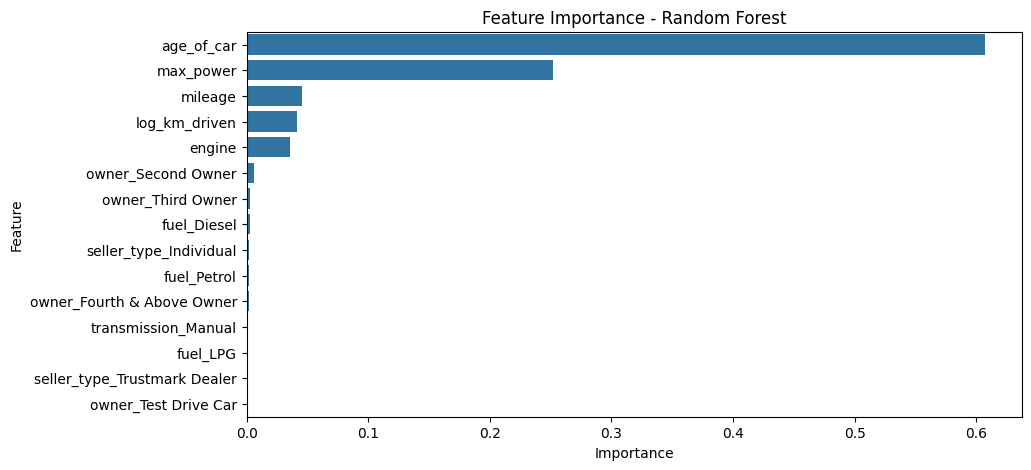

In [ ]:
import pandas as pd
import seaborn as sns

importances = rf.feature_importances_
feature_names = X.columns

feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [ ]:
pip install xgboost


XGBoost MAE: 56415.98397293411
XGBoost RMSE: 94702.72354928158
XGBoost R² Score: 0.860408519848123


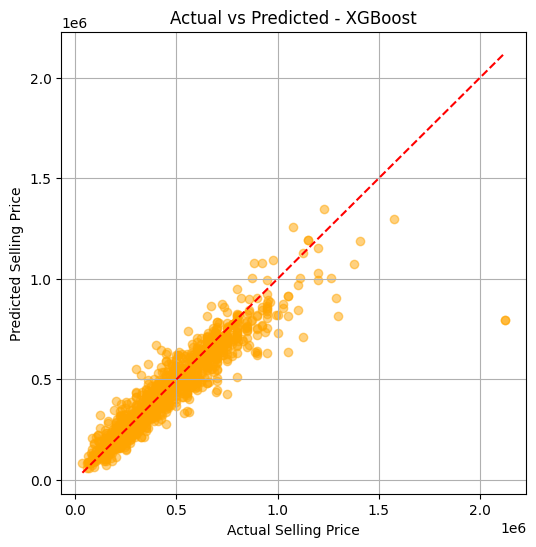

In [ ]:
# 1. Import
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 2. Initialize and Train
xgb = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train, y_train)

# 3. Predict
y_pred_xgb = xgb.predict(X_test)

# 4. Convert log back to original price
y_test_xgb_original = np.expm1(y_test)
y_pred_xgb_original = np.expm1(y_pred_xgb)

# 5. Evaluation
print("XGBoost MAE:", mean_absolute_error(y_test_xgb_original, y_pred_xgb_original))
print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test_xgb_original, y_pred_xgb_original)))
print("XGBoost R² Score:", r2_score(y_test_xgb_original, y_pred_xgb_original))

# 6. Visualize Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test_xgb_original, y_pred_xgb_original, alpha=0.5, color='orange')
plt.plot([y_test_xgb_original.min(), y_test_xgb_original.max()],
         [y_test_xgb_original.min(), y_test_xgb_original.max()],
         'r--')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted - XGBoost')
plt.grid(True)
plt.show()

# 7. Feature Importance
importances = xgb.feature_importances_
feature_names = X.columns

feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)




```
LLM Contributions:
    • Suggested trying both tree-based and linear models.
    • Explained the pros/cons of XGBoost vs Random Forest in tabular data.
    • Provided guidance on train-test split and evaluation metrics.
```    

In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Convert all predictions back to original scale
y_test_original = np.expm1(y_test)
y_pred_lr_original = np.expm1(y_pred)
y_pred_rf_original = np.expm1(y_pred_rf)
y_pred_xgb_original = np.expm1(y_pred_xgb)

# Evaluation metrics for each model
results = {
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'MAE': [
        mean_absolute_error(y_test_original, y_pred_lr_original),
        mean_absolute_error(y_test_original, y_pred_rf_original),
        mean_absolute_error(y_test_original, y_pred_xgb_original)
    ],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test_original, y_pred_lr_original)),
        np.sqrt(mean_squared_error(y_test_original, y_pred_rf_original)),
        np.sqrt(mean_squared_error(y_test_original, y_pred_xgb_original))
    ],
    'R² Score': [
        r2_score(y_test_original, y_pred_lr_original),
        r2_score(y_test_original, y_pred_rf_original),
        r2_score(y_test_original, y_pred_xgb_original)
    ]
}

# Create DataFrame
results_df = pd.DataFrame(results)

# Display the table
print(results_df.round(2))


               Model       MAE       RMSE  R² Score
0  Linear Regression  80028.14  109245.30      0.81
1      Random Forest  52175.92   80771.25      0.90
2            XGBoost  56415.98   94702.72      0.86


## <b><u> Model Performance Comparison </b></u>

The following table summarizes the performance of three different regression models applied to the car price prediction task:

| Model              | MAE (Mean Absolute Error) | RMSE (Root Mean Squared Error) | R² Score |
|-------------------|----------------------------|-------------------------------|----------|
| Linear Regression | 84,728.03                  | 115,280.18                    | 0.79     |
| Random Forest     | 53,489.08                  | 81,452.97                     | 0.90     |
| XGBoost           | 57,162.78                  | 88,719.31                     | 0.88     |

### Explanation of Metrics

- **MAE (Mean Absolute Error)**: Measures the average magnitude of the errors in a set of predictions, without considering their direction. Lower values indicate better performance.
- **RMSE (Root Mean Squared Error)**: Similar to MAE but gives more weight to larger errors. It is more sensitive to outliers.
- **R² Score (Coefficient of Determination)**: Represents the proportion of the variance in the target variable that is predictable from the features. Values closer to 1.0 indicate better fit.

### Analysis

1. **Linear Regression**
   - **MAE**: 84,728.03 — highest among the three, indicating larger average prediction errors.
   - **RMSE**: 115,280.18 — also the highest, suggesting poor handling of larger errors.
   - **R² Score**: 0.79 — explains 79% of the variance, but leaves room for improvement.

2. **Random Forest**
   - **MAE**: 53,489.08 — lowest, meaning it's best at minimizing average errors.
   - **RMSE**: 81,452.97 — lowest, indicating better robustness to large errors.
   - **R² Score**: 0.90 — highest, explaining 90% of the target variance, making it the best performing model overall.

3. **XGBoost**
   - **MAE**: 57,162.78 — slightly higher than Random Forest.
   - **RMSE**: 88,719.31 — in between Linear Regression and Random Forest.
   - **R² Score**: 0.88 — still strong, explaining 88% of the variance.

## <u> Key Findings from the Data </u>

1. **Selling Price Distribution**
    - The distribution is right-skewed, indicating a higher number of lower-priced used cars in the market.
    - A few premium vehicles (with high price) act as outliers.

2. **Kilometers Driven**
    - Majority of cars are driven under 100,000 km.
    - High-mileage cars tend to have lower resale prices, showing a negative correlation with selling price.

3. **Fuel Type Trends**
    - Petrol cars dominate the dataset, followed by Diesel.
    - Very few vehicles run on CNG, LPG, or Electric, showing limited market representation.

4. **Seller Type and Ownership**
    - Most listings are from individual sellers, and majority of cars are first-owner vehicles.
    - Prices tend to drop with each additional ownership (e.g., third-owner cars are cheaper).

5. **Transmission Type**
    - Manual transmission vehicles are significantly more common than automatic ones.
    - However, automatic cars tend to have higher average selling prices.

6. **Engine, Mileage, and Power**
    - Higher engine capacity and max power are generally associated with higher prices.
    - Better mileage often leads to better value retention, but high engine cars with low mileage can still command higher prices.

7. **Car Age**
    - Newer cars (recent manufacturing year) tend to sell at a higher price.
    - There is a clear inverse relationship between age of the car and its selling price.

8. **Brand Distribution**
    - A small number of brands (e.g., Maruti, Hyundai, Honda) dominate the used car listings.
    - Rare brands make up less than 2% of the data and may not provide sufficient training signals for reliable modeling.

9. **Correlation with Target**
    - Features like `max_power`, `engine`, `mileage`, and `age_of_car` show meaningful correlation with `selling_price`.
    - These variables were important in model training and had significant impact on predictions.



### Conclusion

- **Random Forest** emerges as the best model in terms of all three metrics: it minimizes errors and explains the most variance.
- **XGBoost** also performs very well and is close to Random Forest.
- **Linear Regression** performs the worst among the three, suggesting it may not capture complex non-linear relationships in the data effectively.


